In [1]:
# HIDDEN CELL
import sys, os

# Importing argopy in dev mode:
on_rtd = os.environ.get('READTHEDOCS', None) == 'True'
if not on_rtd:
    sys.path.insert(0, "/Users/gmaze/git/github/euroargodev/argopy")
    import git
    import argopy
    from argopy.options import OPTIONS
    print("argopy:", argopy.__version__, 
          "\nsrc:", argopy.__file__, 
          "\nbranch:", git.Repo(search_parent_directories=True).active_branch.name, 
          "\noptions:", OPTIONS)
else:
    sys.path.insert(0, os.path.abspath('..'))

import xarray as xr
# xr.set_options(display_style="html");
xr.set_options(display_style="text");

argopy: 0.1.1 
src: /Users/gmaze/git/github/euroargodev/argopy/argopy/__init__.py 
branch: master-doc 
options: {'src': 'erddap', 'local_ftp': '.', 'dataset': 'phy', 'cachedir': '/Users/gmaze/.cache/argopy', 'mode': 'standard'}


/Users/gmaze/anaconda/envs/obidam36/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Visualization Gallery

In [2]:
from argopy import DataFetcher as ArgoDataFetcher

# For plots:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Map of data around 200db depth for a single month

In [4]:
box = [-80., 0., 10., 65., 200-5., 200+5., '2018-01','2018-02']
ds = ArgoDataFetcher(src='erddap').region(box).to_xarray()
print(ds)

<xarray.Dataset>
Dimensions:          (N_POINTS: 5141)
Coordinates:
    LATITUDE         (N_POINTS) float64 50.08 63.98 24.17 ... 10.26 10.26 10.26
    TIME             (N_POINTS) datetime64[ns] 2018-01-01T00:12:23 ... 2018-01-31T21:23:58
    LONGITUDE        (N_POINTS) float64 -12.57 -55.93 -35.44 ... -20.92 -20.92
  * N_POINTS         (N_POINTS) int64 0 1 3 4 5 6 ... 5528 5529 5530 5531 5532
Data variables:
    CYCLE_NUMBER     (N_POINTS) int64 124 71 160 160 160 ... 124 124 124 124 124
    DATA_MODE        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'R' 'R' 'R' 'R' 'R'
    DIRECTION        (N_POINTS) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 6901920 6901721 ... 4901708 4901708
    POSITION_QC      (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float64 199.7 196.0 196.0 ... 200.0 202.0 204.0
    PRES_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PSAL             (N_POINTS) 

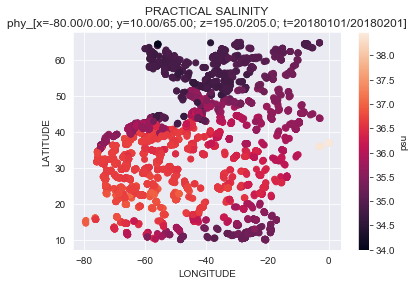

In [5]:
plt.scatter(ds['LONGITUDE'], ds['LATITUDE'], c=ds['PSAL'])
plt.colorbar(label=ds['PSAL'].attrs['units'])
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.gca().grid()
plt.title("%s\n%s" % (ds['PSAL'].attrs['long_name'], ds.attrs['Fetched_constraints']));